# 2DOF Workspace

## Ref.
* https://www.mecharithm.com/task-space-and-workspace-for-robots/

## Yaskawa 협동로봇
* https://www.motoman.com/en-us/products/robots/collaborative/hc-series
* https://www.motoman.com/en-us/products/robots/collaborative/hc-series/hc30pl
* https://www.motoman.com/getmedia/9eaa1ed1-fc8b-4772-b0c8-7499f2551c53/ds_HC30PL.pdf.aspx


In [170]:
# number of samples
N = 1000;

# link lengths
l1 = 800.0;
l2 = 700.0;

# joint angle limitations
theta1_min = -90;
theta1_max = 130;
theta2_min = 0;
theta2_max = 150;

In [171]:
# limitations on theta1
theta1_start_end = [theta1_min,theta1_max];
# change the angle to Radians
theta1_start_end = theta1_start_end*pi/180;

# limitations on theta2
theta2_start_end =[theta2_min,theta2_max];
# change the angle to Radians
theta2_start_end = theta2_start_end*pi/180;

In [172]:
# joint angles 
theta1 = LinRange(theta1_min,theta1_max,N);
# change the angle to Radians
theta1 = theta1*pi/180;

theta2 = LinRange(theta2_min,theta2_max,N);
# change the angle to Radians
theta2 = theta2*pi/180;

In [173]:
# intialization of the x and y
x = zeros(2*length(theta1_start_end),length(theta2));
y = zeros(2*length(theta1_start_end),length(theta2));
# x and y are calculated using kinematics
for i in [1:2;]
    for j in [1:length(theta1);]
        x[i,j] = @. l1*cos(theta1[j]) + l2*cos(theta1[j] + theta2_start_end[i]);
        y[i,j] = @. l1*sin(theta1[j]) + l2*sin(theta1[j] + theta2_start_end[i]);
    end
    for k in [1:length(theta1);]
         x[i+2,k] = @. l1*cos(theta1_start_end[i]) + l2*cos(theta1_start_end[i] + theta2[k]);
         y[i+2,k] = @. l1*sin(theta1_start_end[i]) + l2*sin(theta1_start_end[i] + theta2[k]);
    end
end
x = x';
y = y';

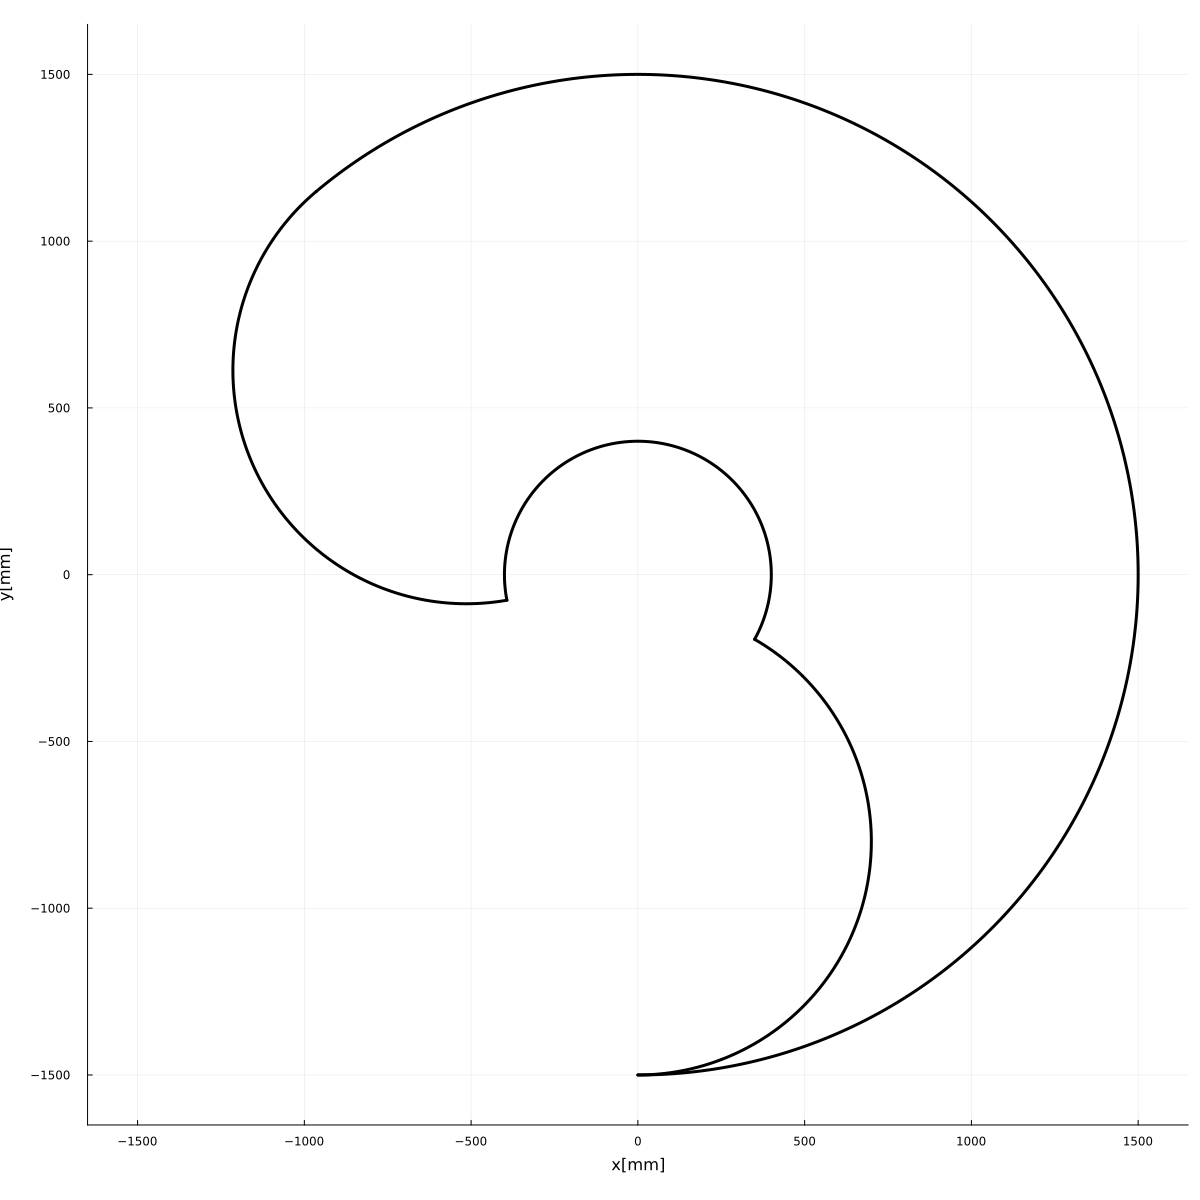

In [174]:
# plotting
using Plots
XLIMIT = 1.1*(l1+l2);
YLIMIT = 1.1*(l1+l2);
ISIZE = 1200;
plot( x[:,1],y[:,1],linewidth=3,color="black",legend=false,aspect_ratio=1,size=(ISIZE,ISIZE),xlabel="x[mm]",ylabel="y[mm]",xlims=[-XLIMIT,YLIMIT],ylims=[-YLIMIT,YLIMIT])
plot!(x[:,2],y[:,2],linewidth=3,color="black")
plot!(x[:,3],y[:,3],linewidth=3,color="black")
plot!(x[:,4],y[:,4],linewidth=3,color="black")
#plot!([0,0,l2],[0,l1,l1],linewidth=5,color="magenta")

In [175]:
savefig("2DOF_workspace1.png")

"D:\\WORK\\20230329_2DOF_Workspace\\2DOF_workspace1.png"

## Point Coud

In [176]:
# number of samples
N2 = 100;

In [177]:
# joint angles 
theta21 = LinRange(theta1_min,theta1_max,N2);
# change the angle to Radians
theta21 = @. theta21*pi/180;

theta22 = LinRange(theta2_min,theta2_max,N2);
# change the angle to Radians
theta22 = @. theta22*pi/180;

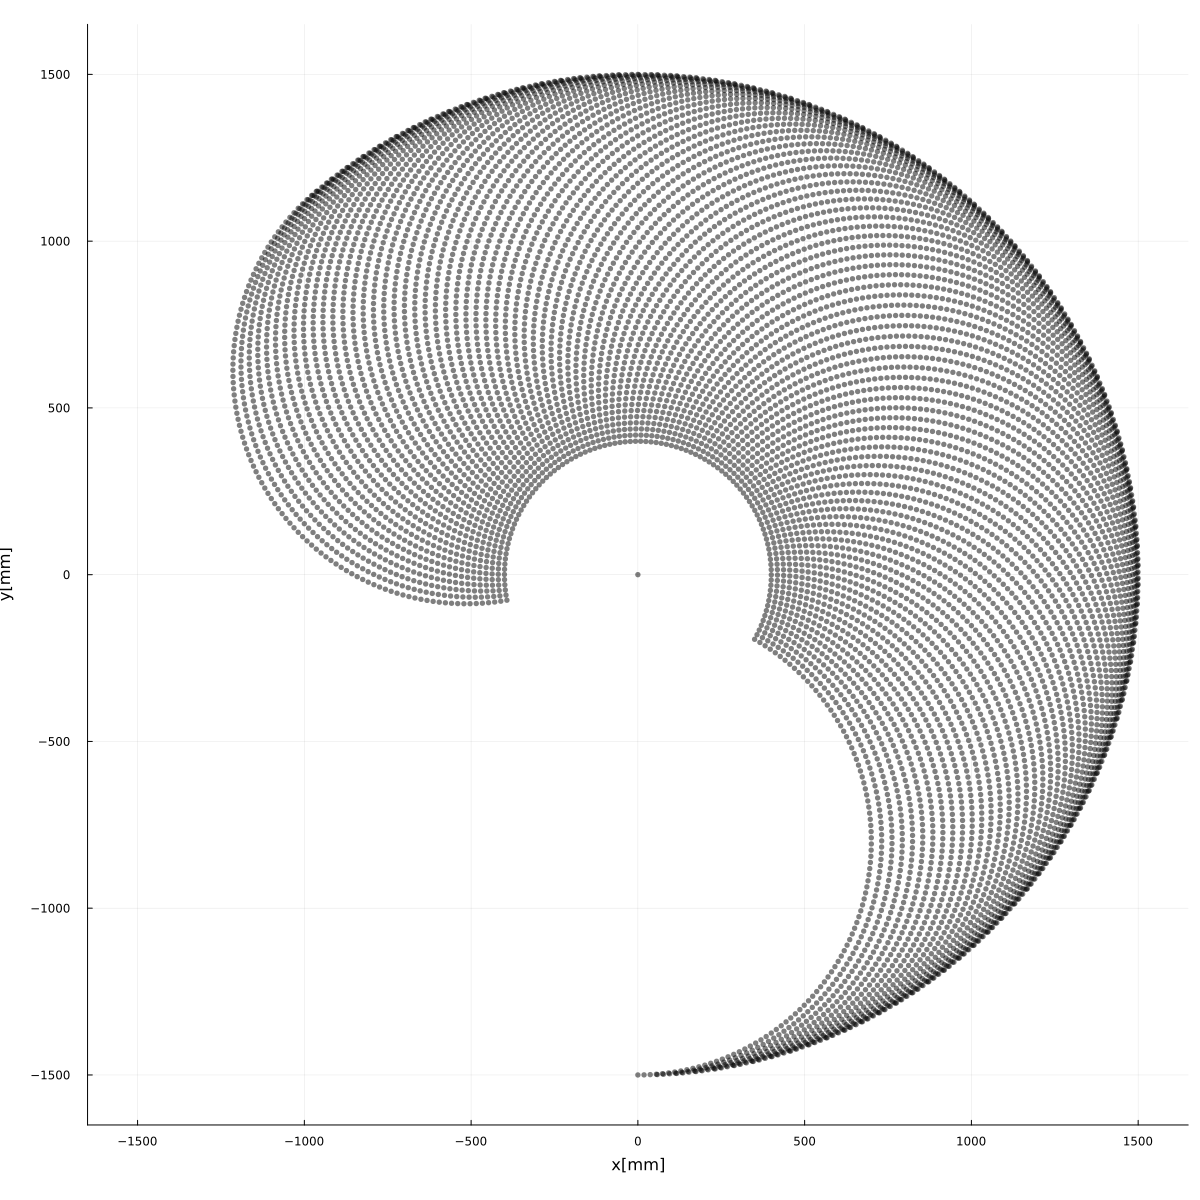

In [178]:
x2 = [0.0];  y2 = [0.0];
x2_temp = x2;  y2_temp = y2;
for i2 in [1:length(theta21);]
    for j2 in [1:length(theta22);]
        x2_temp = @. l1*cos(theta21[i2]) + l2*cos(theta21[i2]+theta22[j2]);
        y2_temp = @. l1*sin(theta21[i2]) + l2*sin(theta21[i2]+theta22[j2]);
        x2 = append!(x2,x2_temp);
        y2 = append!(y2,y2_temp);
    end
end
scatter(x2,y2,markersize=3,markercolor="black",markeralpha=0.5,markershape=:circle,legend=false,aspect_ratio=1,size=(ISIZE,ISIZE),xlabel="x[mm]",ylabel="y[mm]",xlims=[-XLIMIT,YLIMIT],ylims=[-YLIMIT,YLIMIT])

In [179]:
savefig("2DOF_workspace2.png")

"D:\\WORK\\20230329_2DOF_Workspace\\2DOF_workspace2.png"

In [180]:
run(`magick composite -dissolve 60 2DOF_workspace1.png 2DOF_workspace2.png 2DOF_workspace3.png`)

Process(`magick composite -dissolve 60 2DOF_workspace1.png 2DOF_workspace2.png 2DOF_workspace3.png`, ProcessExited(0))

![](2DOF_workspace3.png)